In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [2]:
# Import dataset
train_data = pd.read_csv('../input/train.csv')
print(train_data.shape)
train_data.describe()
train_data.info()

(32000, 785)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000 entries, 0 to 31999
Columns: 785 entries, label to 783
dtypes: int64(785)
memory usage: 191.7 MB


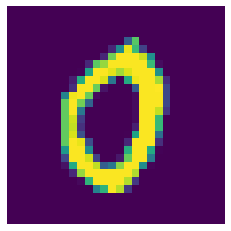

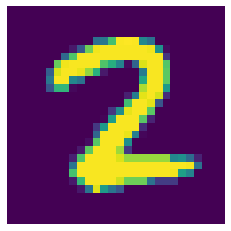

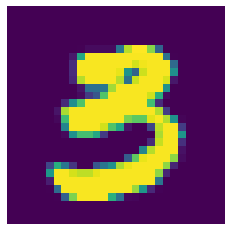

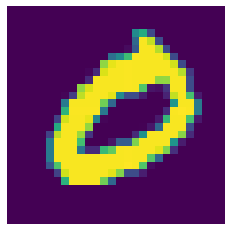

0
2
3
0


In [3]:
# Construct digit from pixel values
for val in (10, 25, 1000, 2500):
    sample_digit = train_data.iloc[val][1:]
    sample_digit_mtx = sample_digit.values.reshape(28,28)
    plt.imshow(sample_digit_mtx)
    plt.axis("off")
    plt.show()

# Confirm values
for val in (10, 25, 1000, 2500):
    print(train_data.iloc[val][0])

In [4]:
# Check missing values
train_data.isnull().any().describe()

count       785
unique        1
top       False
freq        785
dtype: object

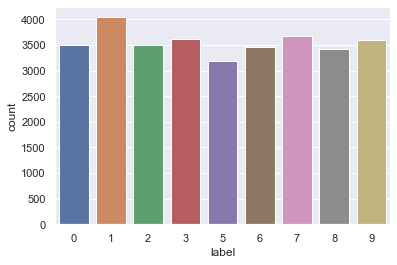

In [5]:
# Plot digit frequencies
plt.ioff()
sns.set_theme(style='darkgrid')
ax = sns.countplot(data=train_data, x='label')

In [6]:
# Reshape
x = train_data.drop(['label'], axis=1)
y = train_data['label']
print(x.shape)
print(y.shape)

(32000, 784)
(32000,)


In [7]:
# Split training and validation sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [8]:
# SGD Classifier
sgd_clf = SGDClassifier(random_state=42, n_jobs=1)
sgd_clf_log = SGDClassifier(random_state=42, n_jobs=1, loss='log')

sgd_clf.fit(x_train, y_train)
sgd_clf_log.fit(x_train, y_train)

SGDClassifier(loss='log', n_jobs=1, random_state=42)

In [9]:
# SGD Accuracy
y_pred_sgd_clf = sgd_clf.predict(x_test)
y_pred_sgd_clf_log = sgd_clf_log.predict(x_test)

print(accuracy_score(y_test, y_pred_sgd_clf))
print(accuracy_score(y_test, y_pred_sgd_clf_log))

0.8790625
0.894375


In [10]:
# SGD prediction
y_test_pred_sgd = sgd_clf.predict(x_test)

# CM for false pos/neg
confusion_matrix(y_test, y_test_pred_sgd)

array([[335,   0,   1,   0,   6,   6,   0,   3,   0],
       [  1, 392,   4,   1,   2,   0,   3,   7,   3],
       [  2,   1, 271,  10,  10,   4,   5,  13,   2],
       [  3,   3,  15, 280,  33,   2,   3,  14,   6],
       [  2,   0,   2,   3, 274,   6,   0,  13,   7],
       [  3,   0,   4,   1,   8, 336,   0,   1,   0],
       [  3,   0,  10,   7,   6,   0, 323,   2,  28],
       [  3,   6,   4,   3,  46,   2,   2, 271,  25],
       [  3,   2,   1,   0,  10,   1,   7,   3, 331]])

In [11]:
# Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=30, random_state=42, n_jobs=-1, verbose=1)
rf_clf.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    6.7s finished


RandomForestClassifier(max_leaf_nodes=30, n_estimators=500, n_jobs=-1,
                       random_state=42, verbose=1)

In [13]:
# RF Accuracy
y_test_pred_rf_clf = rf_clf.predict(x_test)
accuracy_score(y_test, y_test_pred_rf_clf)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished


0.895625

In [14]:
# K-Nearest Neighbors Classifier
param_grid = [{
    'weights': ['uniform', 'distance'],
    'n_neighbors': [5, 8, 13],
}]

knn_clf = KNeighborsClassifier(n_jobs=-1)

# GSCV trying different hyperparameters
grid_search_knn = GridSearchCV(knn_clf, param_grid, cv=3, verbose=3)
grid_search_knn.fit(x_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] n_neighbors=5, weights=uniform ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...... n_neighbors=5, weights=uniform, score=0.960, total=  58.3s
[CV] n_neighbors=5, weights=uniform ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   58.3s remaining:    0.0s


[CV] ...... n_neighbors=5, weights=uniform, score=0.962, total=  54.3s
[CV] n_neighbors=5, weights=uniform ..................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.9min remaining:    0.0s


[CV] ...... n_neighbors=5, weights=uniform, score=0.962, total=  54.5s
[CV] n_neighbors=5, weights=distance .................................
[CV] ..... n_neighbors=5, weights=distance, score=0.962, total=  51.7s
[CV] n_neighbors=5, weights=distance .................................
[CV] ..... n_neighbors=5, weights=distance, score=0.965, total=  49.5s
[CV] n_neighbors=5, weights=distance .................................
[CV] ..... n_neighbors=5, weights=distance, score=0.964, total=  48.0s
[CV] n_neighbors=8, weights=uniform ..................................
[CV] ...... n_neighbors=8, weights=uniform, score=0.957, total=  52.7s
[CV] n_neighbors=8, weights=uniform ..................................
[CV] ...... n_neighbors=8, weights=uniform, score=0.959, total=  54.8s
[CV] n_neighbors=8, weights=uniform ..................................
[CV] ...... n_neighbors=8, weights=uniform, score=0.958, total=  55.7s
[CV] n_neighbors=8, weights=distance .................................
[CV] .

[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed: 17.2min finished


GridSearchCV(cv=3, estimator=KNeighborsClassifier(n_jobs=-1),
             param_grid=[{'n_neighbors': [5, 8, 13],
                          'weights': ['uniform', 'distance']}],
             verbose=3)

In [15]:
# Optimal KNN hyperparameters
print(f'KNN best params: {grid_search_knn.best_params_}')
print(f'KNN best score: {grid_search_knn.best_score_}')

KNN best params: {'n_neighbors': 5, 'weights': 'distance'}
KNN best score: 0.9637847222222223


In [16]:
# Tune KNN accuracy with k hyperparameter
accuracies = []
for k in np.arange(4, 13):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=3, n_jobs=-1, verbose=3)
    accuracies.append(scores.mean())
print(accuracies)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  4.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
/Users/vishaal/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  4.8min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  4.4min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  4.4min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  5.7min finished


[0.9602430555555556, 0.9615277777777779, 0.9601736111111112, 0.9595486111111112, 0.9581597222222222, 0.9581944444444445, 0.9561458333333333, 0.9557638888888889, 0.9545486111111111]


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  4.6min finished


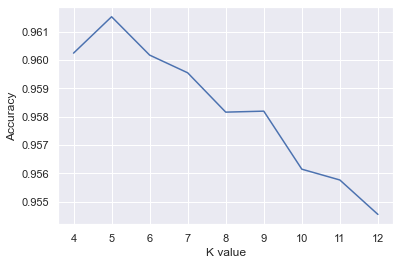

In [17]:
# Visualize tuning
plt.plot(np.arange(4,13), accuracies)
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.show()

In [18]:
# SVM Classifier
svm_clf = SVC(kernel='rbf', random_state=42, verbose=3)
svm_clf.fit(x_train, y_train)

[LibSVM]

SVC(random_state=42, verbose=3)

In [19]:
# SVM prediction and accuracy
y_test_pred_svm = svm_clf.predict(x_test)
accuracy_score(y_test, y_test_pred_svm)

0.9809375

In [20]:
# GSCV for SVC with different hyperparameters C
params_grid_svm = {'C': [0.1, 1, 10, 100]}
grid_search_svm = GridSearchCV(
    SVC(kernel='rbf', random_state=42),
    param_grid=params_grid_svm,
    verbose=3,
)
grid_search_svm.fit(x_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................... C=0.1, score=0.945, total= 3.0min
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.0min remaining:    0.0s


[CV] ............................... C=0.1, score=0.947, total= 2.9min
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  5.8min remaining:    0.0s


[CV] ............................... C=0.1, score=0.948, total= 2.9min
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.948, total= 2.9min
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.947, total= 2.8min
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.973, total= 1.5min
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.975, total= 1.5min
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.973, total= 1.4min
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.972, total= 1.4min
[CV] C=1 .............................................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed: 35.7min finished


GridSearchCV(estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10, 100]}, verbose=3)

In [21]:
# Optimal SVM hyperparameters
print(f'SVM best params: {grid_search_svm.best_params_}')
print(f'SVM best score: {grid_search_svm.best_score_}')

SVM best params: {'C': 100}
SVM best score: 0.9798611111111111


In [23]:
# Voting Classifier (ensemble) with optimal values
sgd_clf = SGDClassifier(random_state=42)
rf_clf = RandomForestClassifier(n_estimators=500, random_state=42, n_jobs=-1, verbose=1)
knn_clf = KNeighborsClassifier(n_neighbors=5, weights='distance')
svm_clf = SVC(kernel='rbf', C=100, probability=True, random_state=42)

voting_clf = VotingClassifier(estimators=[
    ('sgd', sgd_clf),
    ('rfc', rf_clf),
    ('knn', knn_clf),
    ('svc', svm_clf),
])
voting_clf.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   19.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   22.1s finished


VotingClassifier(estimators=[('sgd', SGDClassifier(random_state=42)),
                             ('rfc',
                              RandomForestClassifier(n_estimators=500,
                                                     n_jobs=-1, random_state=42,
                                                     verbose=1)),
                             ('knn', KNeighborsClassifier(weights='distance')),
                             ('svc',
                              SVC(C=100, probability=True, random_state=42))])

In [24]:
# Implement classifiers
for clf in (sgd_clf, rf_clf, knn_clf, svm_clf, voting_clf):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

SGDClassifier 0.8790625


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   19.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.2s finished


RandomForestClassifier 0.973125
KNeighborsClassifier 0.97125
SVC 0.9840625


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   23.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.2s finished


VotingClassifier 0.97625


In [25]:
# Voting test results
voting_clf = VotingClassifier(estimators=[("rfc", rf_clf), ("knn", knn_clf), ("svc", svm_clf)], voting="soft")
voting_clf.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   27.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   33.0s finished


VotingClassifier(estimators=[('rfc',
                              RandomForestClassifier(n_estimators=500,
                                                     n_jobs=-1, random_state=42,
                                                     verbose=1)),
                             ('knn', KNeighborsClassifier(weights='distance')),
                             ('svc',
                              SVC(C=100, probability=True, random_state=42))],
                 voting='soft')

In [26]:
# Voting prediction and accuracy
y_pred_vote_clf = voting_clf.predict(x_test)
accuracy_score(y_test, y_pred_vote_clf)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.2s finished


0.984375

In [33]:
# Prepare the submission
test_data = pd.read_csv('../input/test.csv')

mnist_ids = [i for i in range(test_data.shape[0])]
y_test_pred_vote_clf = voting_clf.predict(test_data)

test_submission = pd.DataFrame(list(zip(mnist_ids, y_test_pred_vote_clf)), columns=['id','label'])
test_submission.to_csv('test_submission.csv', index=False)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.2s finished
